In [1]:
import sys
from pathlib import Path

p_temp = str(Path('~/link/TACMAN').expanduser())
None if p_temp in sys.path else sys.path.append(p_temp)
del p_temp

In [2]:
from IPython.display import display

import TACMAN
from TACMAN.utils.general import np,pd,sc,plt,mpl
from TACMAN.utils.general import get_time_tag

# set p_homo

set the `p_homo` as the storage path for the gene homology relationship file between species. We provided a few gene homologous files, which are stored under the path `TACMAN/homo`.

In [3]:
p_homo = Path('~/link/TACMAN/homo').expanduser()


def get_homo_path(
        sp_ref,
        sp_que,
        p_homo_info
):
    p_homo_info = Path(p_homo_info)
    df_info = pd.read_csv(p_homo_info)
    index_ = df_info.query("sp_ref == '{}' & sp_que == '{}'".format(sp_ref, sp_que)).index
    assert index_.size == 1, "[get {} path]can not get speicifed and unique path\nsp_ref\tsp_que\n{}\t{}".format(
        index_.size, sp_ref, sp_que)
    res = Path(df_info.loc[index_[0], 'path'])
    if not res.is_absolute():
        res = p_homo_info.parent.joinpath(res)
    assert res.exists(), "[not exists] {}".format(res)
    return res

get_homo_path('human','mouse',p_homo.joinpath('info.csv'))\
    .__str__()[36:] # Hide my path

'TACMAN/homo/human_to_mouse.txt'

# run

set parameters and run TACMAN.

In [4]:
para = dict(
    adata_ref = sc.read_h5ad(Path('data/pancreas_h').joinpath('counts.h5ad')),
    adata_que = sc.read_h5ad(Path('data/pancreas_m').joinpath('counts.h5ad')),
    sp_ref = 'human',
    sp_que = 'mouse',
    key_cell_type = 'cell_type',
    tissue = 'pancreas',
    aligned=True,
    p_output=Path('output'),
    tag_output=get_time_tag()
)
para['p_homo'] = get_homo_path(para['sp_ref'],para['sp_que'],p_homo.joinpath('info.csv'))

# Optional
para['tag_output'] = 'pan_h-map-pan_m;aligned={}'.format(para['aligned'])
para['stages']=[100,100,100] # default [100,200,200]
para['is_1v1']=False
TACMAN.run(**para)

[250108-112323][has finished] pancreas;human-corss-mouse;pan_h-map-pan_m;aligned=True


# Reuslt

## load adata

In [5]:
p_output = Path('output','pancreas;human-corss-mouse;pan_h-map-pan_m;aligned=True')

adata = TACMAN.tl.load_result_adata(p_output,load_X=False)
display(adata)

AnnData object with n_obs × n_vars = 9422 × 0
    obs: 'UMAP1', 'UMAP2', 'cell_type', 'type', 'species', 'true_label', 'pre_label', 'max_prob', 'is_right', 'model_label'
    uns: 'p_item', 'p_fig', 'parameters'
    obsm: 'X_umap'

## get accuracy and weighted_f1_socre

In [6]:
print(
    'weighted_f1_socre',
    TACMAN.get_weighted_f1_score(adata),
    'ACC',
    TACMAN.get_accuracy(adata),sep='\n'
)

weighted_f1_socre
{'ref': 0.9949771541274451, 'que': 0.9748158808285771}
ACC
{'ref': 0.9949742097606137, 'que': 0.9758194519075766}


## plot

In [7]:
TACMAN.pl.cmap.COLOR_DF

,palette_type,colors,length
name,,,
NPG,nrc,"#E64B35,#4DBBD5,#00A087,#3C5488,#F39B7F,#8491B...",10
AAAS,default,"#3B4992,#EE0000,#008B45,#631879,#008280,#BB002...",10
NEJM,default,"#BC3C29,#0072B5,#E18727,#20854E,#7876B1,#6F99A...",8
Lancet,lanonc,"#00468B,#ED0000,#42B540,#0099B4,#925E9F,#FDAF9...",9
JAMA,default,"#374E55,#DF8F44,#00A1D5,#B24745,#79AF97,#6A659...",7
BMJ,default,"#2A6EBB,#F0AB00,#C50084,#7D5CC6,#E37222,#69BE2...",9
JCO,default,"#0073C2,#EFC000,#868686,#CD534C,#7AA6DC,#003C6...",10
UCSCGB,default,"#FF0000,#FF9900,#FFCC00,#00FF00,#6699FF,#CC33F...",26
D3,category20,"#1F77B4,#FF7F0E,#2CA02C,#D62728,#9467BD,#8C564...",20


In [8]:
kw_scatter=dict(s=1)

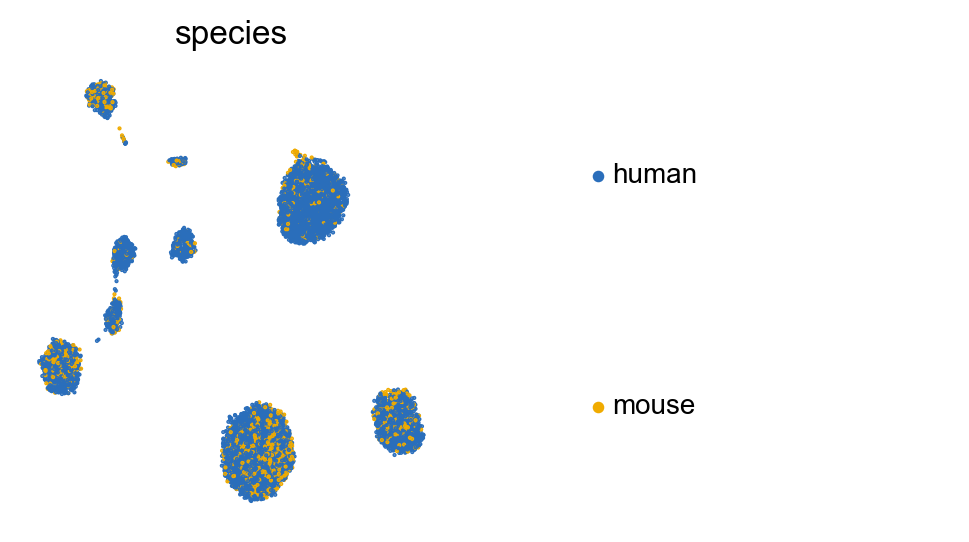

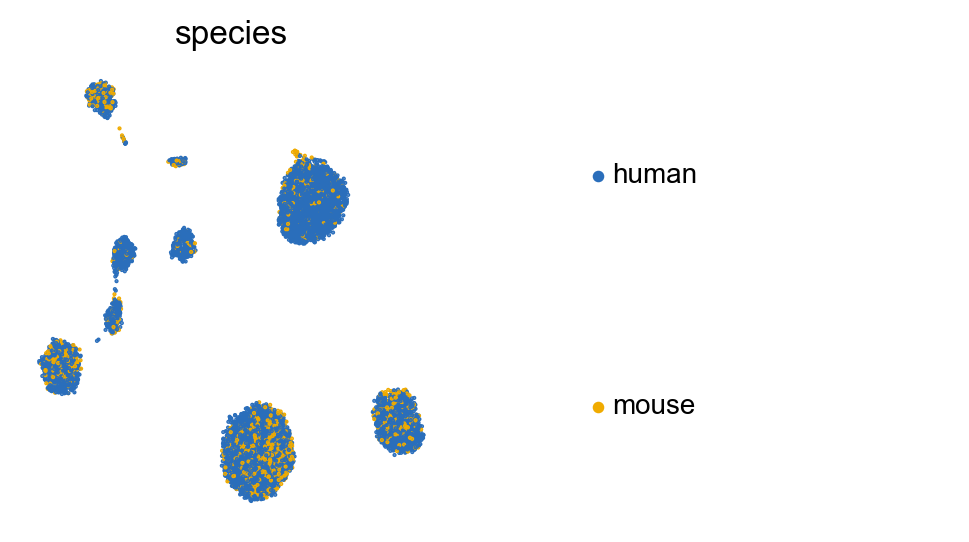

In [9]:
plt.close('all')
fig,axs = TACMAN.pl.figure.subplots_get_fig_axs(
    nrows=1,ncols=2,ratio_ncols=3,ratio_nrows=3,
    rc=TACMAN.pl.rc_frame
)

cmap = TACMAN.pl.cmap.get('BMJ',['human','mouse'])

TACMAN.pl.umap(adata,'species',cmap=cmap,ax=axs[0],kw_scatter=kw_scatter)
axs[0].set_title('species')
TACMAN.pl.cmap.show(cmap,ax=axs[1],text_x=.01)

display(fig)
del cmap,axs,fig

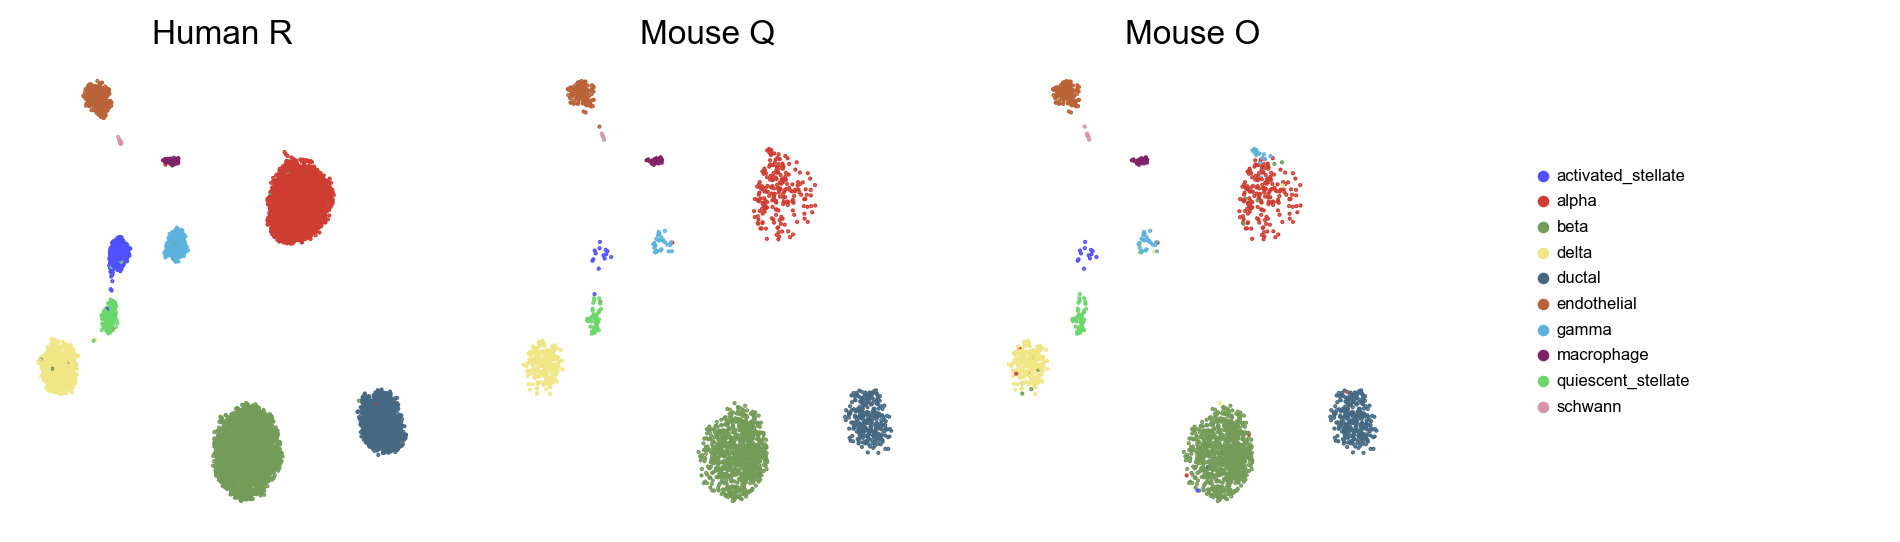

In [10]:
plt.close('all')
fig,axs = TACMAN.pl.figure.subplots_get_fig_axs(
    nrows=1,ncols=4,ratio_ncols=3,ratio_nrows=3,
    rc=TACMAN.pl.rc_frame
)

cmap = TACMAN.pl.cmap.get('IGV',np.unique(adata.obs['true_label']))

ax = axs[0]
TACMAN.pl.umap(adata[adata.obs['type'] == 'ref'],
               'model_label',cmap=cmap,ax=ax,kw_scatter=kw_scatter)
ax.set_title('Human R')

ax = axs[1]
TACMAN.pl.umap(adata[adata.obs['type'] == 'que'],
               'model_label',cmap=cmap,ax=ax,kw_scatter=kw_scatter)
ax.set_title('Mouse Q')

ax = axs[2]
TACMAN.pl.umap(adata[adata.obs['type'] == 'que'],
               'true_label',cmap=cmap,ax=ax,kw_scatter=kw_scatter)
ax.set_title('Mouse O')

ax = axs[3]
TACMAN.pl.cmap.show(cmap,ax=ax,text_x=.01,fontdict=dict(fontsize=6))

display(fig)
del cmap,axs,fig

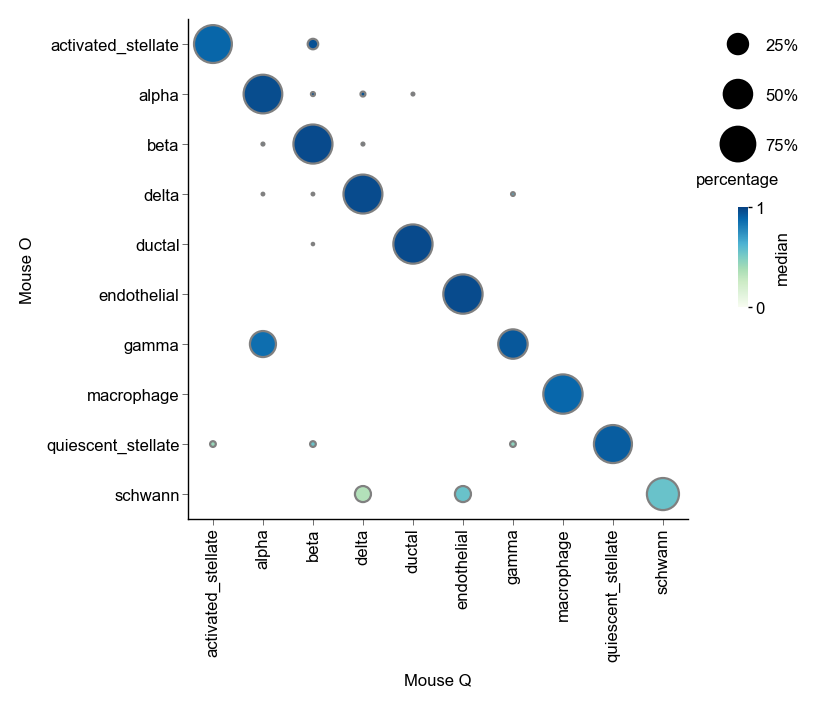

In [11]:
plt.close('all')

ax=TACMAN.pl.max_prob(adata,dataset_type='que',factor_size=200,
                      fontdict_xtick=dict(rotation=90))
ax.set_xlabel('Mouse Q')
ax.set_ylabel('Mouse O')

ax.figure

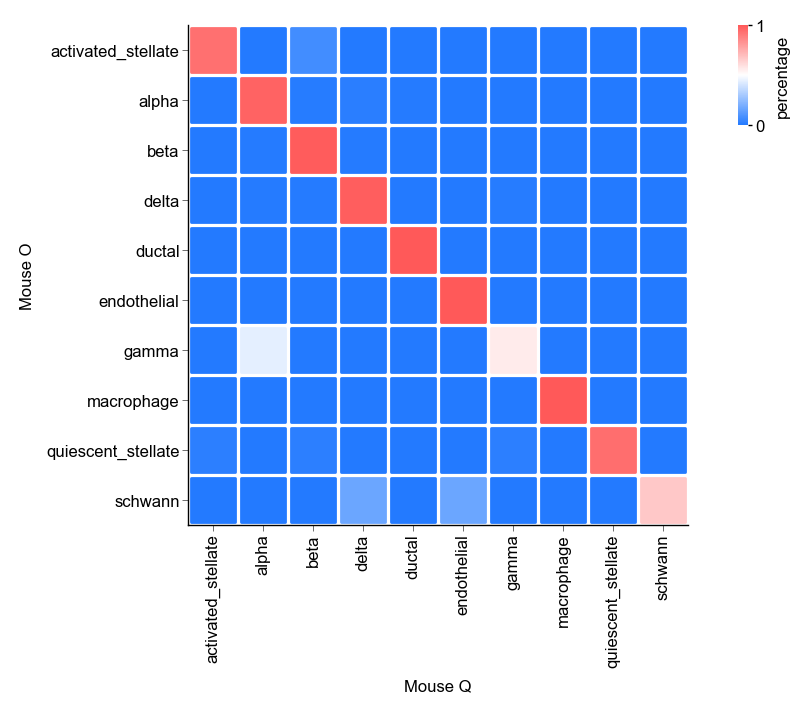

In [12]:
plt.close('all')
cmap = mpl.colors.LinearSegmentedColormap.from_list("mycmap",
            '#237AFF,#FFFFFF,#FF5959'.split(','))
ax=TACMAN.pl.confusion_matrix(adata,dataset_type='que',
    cmap=cmap,fontdict_xtick=dict(rotation=90))
ax.set_xlabel('Mouse Q')
ax.set_ylabel('Mouse O')

ax.figure